<a href="https://colab.research.google.com/github/yukki-github/WiFi-Profile-eduroam/blob/master/Ch3_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas_datareader.data as pdr

def get_stock_data(code):
  df = pdr.DataReader("{}.JP".format(code), "stooq").sort_index()
  return df

In [ ]:
pip install mplfinance

     |████████████████████████████████| 62 kB 1.1 MB/s 


In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
!cd ta-lib && ./configure --prefix=/usr && make && make install
!pip install Ta-Lib

--2021-12-03 05:00:38--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-12-03 05:00:38--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://kumisystems.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-12-03 05:00:38--  http://kumisystems.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving kumisys

In [ ]:
df = get_stock_data(6670)

In [ ]:
import talib as ta

df = get_stock_data(6670)  # (株)MCJ(6670)の株価を取得

# 終値からMACDを計算
close = df['Close']           
macd, macdsignal, _ = ta.MACD(close,
                                     fastperiod=12, slowperiod=26, signalperiod=9)
df['macd'] = macd
df['macd_signal'] = macdsignal
df.tail()

,Open,High,Low,Close,Volume,macd,macd_signal
Date,,,,,,,
2021-11-26,1002.0,1015.0,1001.0,1014.0,149600,-45.680108,-36.569122
2021-11-29,999.0,1007.0,982.0,989.0,228000,-50.402640,-39.335826
2021-11-30,1004.0,1016.0,984.0,986.0,257100,-53.767557,-42.222172
2021-12-01,1006.0,1011.0,980.0,1000.0,240000,-54.674343,-44.712606
2021-12-02,1004.0,1021.0,999.0,999.0,235800,-54.841490,-46.738383


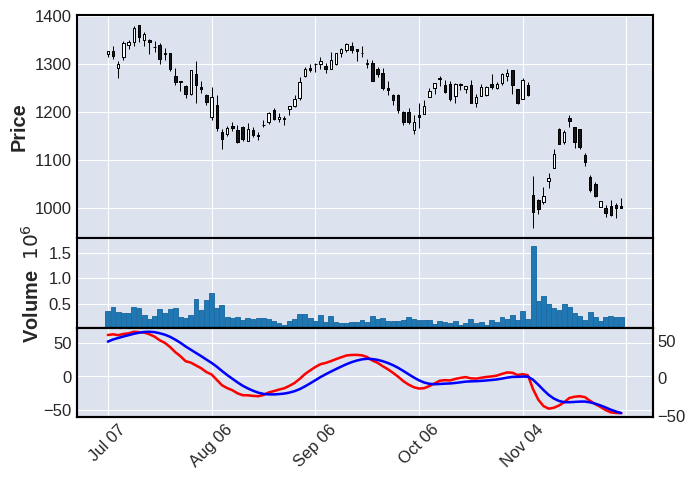

In [ ]:
import mplfinance as mpf
mdf = df.tail(100) # 直近100日分のデータ
apd  = [
    mpf.make_addplot(mdf['macd'], panel=2, color='red'),# パネルの2番地に赤で描画
    mpf.make_addplot(mdf['macd_signal'], panel=2, color='blue'), 
]
mpf.plot(mdf, type='candle', volume=True, addplot=apd)

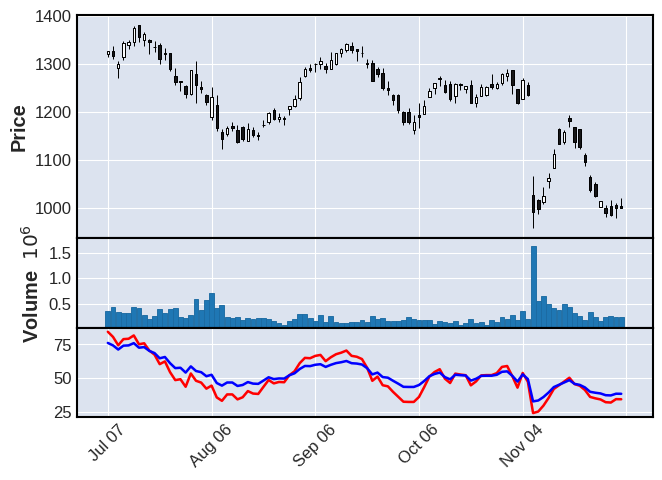

In [ ]:
rsi14 = ta.RSI(close, timeperiod=14)
rsi28 = ta.RSI(close, timeperiod=28)
df['rsi14'], df['rsi28'] = rsi14, rsi28

mdf = df.tail(100)
apd  = [
    mpf.make_addplot(mdf['rsi14'], panel=2, color='red'),
    mpf.make_addplot(mdf['rsi28'], panel=2, color='blue')
]
mpf.plot(mdf, type='candle', volume=True, addplot=apd)

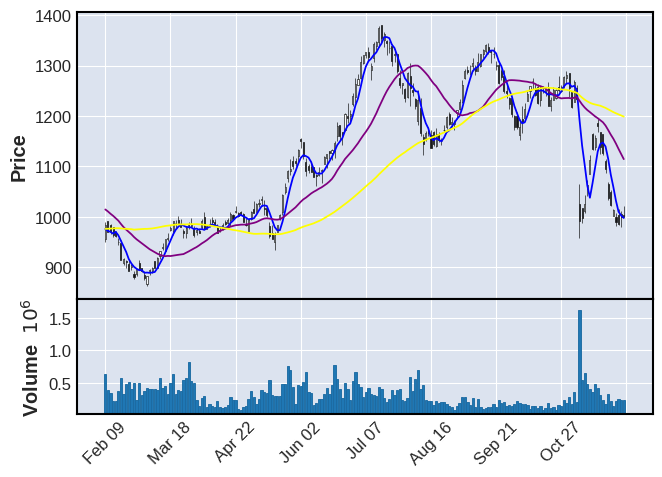

In [ ]:
ma5, ma25, ma75  = ta.SMA(close, timeperiod=5), ta.SMA(close, timeperiod=25), ta.SMA(close, timeperiod=75)
df['ma5'], df['ma25'], df['ma75'] = ma5, ma25, ma75

mdf = df.tail(200)

apd  = [
    mpf.make_addplot(mdf['ma5'], panel=0, color='blue'),
    mpf.make_addplot(mdf['ma25'], panel=0, color='purple'),
    mpf.make_addplot(mdf['ma75'], panel=0, color='yellow'),
]
mpf.plot(mdf, type='candle', volume=True, addplot=apd)

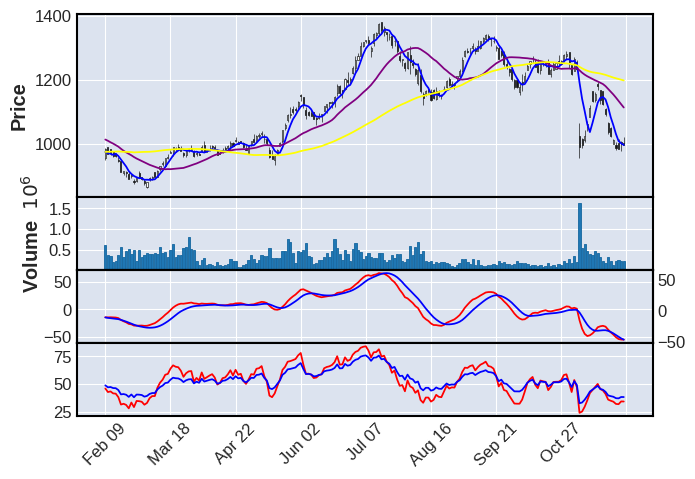

In [ ]:
mdf = df.tail(200)
apd  = [
    mpf.make_addplot(mdf['ma5'], panel=0, color='blue'),
    mpf.make_addplot(mdf['ma25'], panel=0, color='purple'),
    mpf.make_addplot(mdf['ma75'], panel=0, color='yellow'),
    mpf.make_addplot(mdf['macd'], panel=2, color='red'),
    mpf.make_addplot(mdf['macd_signal'], panel=2, color='blue'),
    mpf.make_addplot(mdf['rsi14'], panel=3, color='red'),
    mpf.make_addplot(mdf['rsi28'], panel=3, color='blue')
]
mpf.plot(mdf, type='candle', volume=True, addplot=apd)